<a href="https://colab.research.google.com/github/Akyzia/Atividades_Python/blob/main/INF01050_CMP620_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Deep Learning for Visual Computing (INF01050 and CMP620)**
# <font color='red'>Lab 1 - Our first neural network based on a simple **MultiLayer Perceptron (MLP)</font>**


The goal of this lab is to define the architecture of a simple MLP in Keras, and train it using a simple classification dataset: MNIST


Initially, we will load the MNIST dataset (available in tensorflow)

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# Loads the "x" (data) and "y" (labels) for the train and test folds
(x_train, y_train),(x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Next, we check quantitative information about the dataset (number of samples, data types, image dimensions)

In [ ]:
# Number of training and test samples
n_train = len(x_train)
n_test =  len(x_test)
print('Training images: %d' % n_train)
print('Test images: %d' % n_test)

# Image sizes:
print('\nDimension of the images')
print(x_train[0].shape)

# Data type:
print('\nDatatype of the images:', x_train.dtype)
print('Datatype of the labels:', y_train.dtype)

Training images: 60000
Test images: 10000

Dimension of the images
(28, 28)

Datatype of the images: uint8
Datatype of the labels: uint8


As we can see, the input data consists of $28 \times 28$ images in $\texttt{uint8}$ format. Now, we will convert the images to $\texttt{float32}$ and normalize in the range $[0,1]$
. Then, we will perform a visual (exploratory) analysis of the data

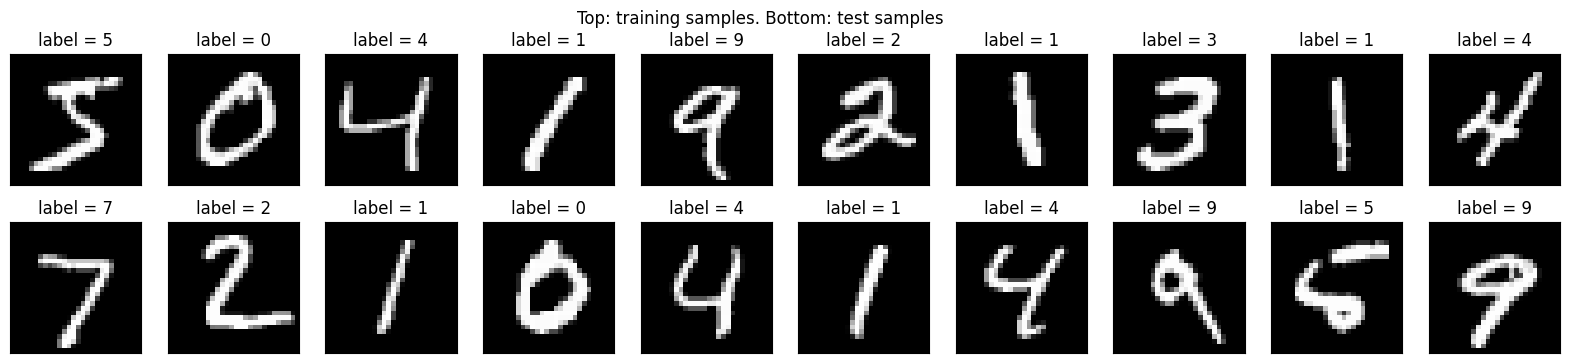

In [ ]:
import matplotlib.pyplot as plt

# Data type conversion
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255

# Will show the first 10 images from the train and test sets
n = 10
fig = plt.figure(figsize=(20, 4))
for i in range(n):
  # train data
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title('label = %d' % y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # test data
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title('label = %d' % y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  fig.suptitle('Top: training samples. Bottom: test samples')
plt.show()

It is also interesting to take a look at the **label distribution** in the training set to evaluate a possible **imbalance**.

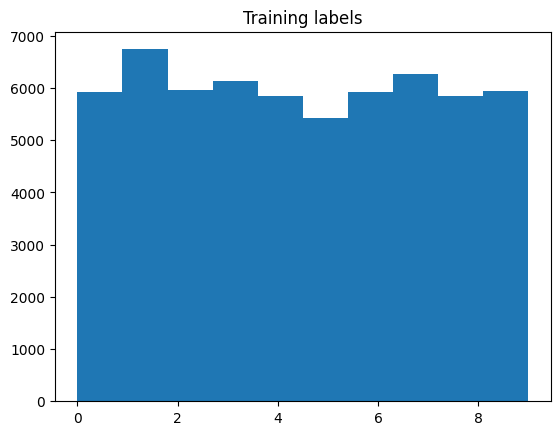

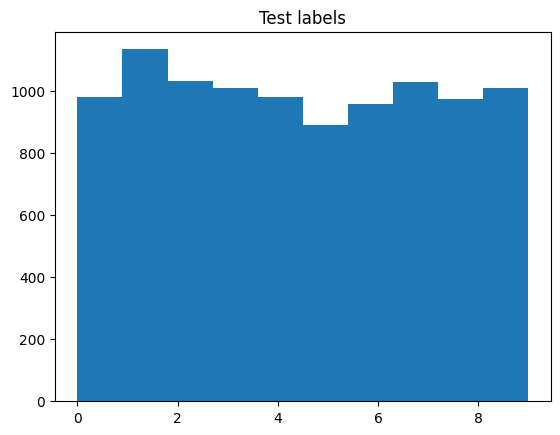

In [ ]:
#
#  Compute the histogram of annotated labels in the train and test sets
#
hist_train = plt.hist(y_train, bins = 10)
plt.title('Training labels')
plt.show()

hist_test = plt.hist(y_test, bins = 10)
plt.title('Test labels')
plt.show()

Moving on, we will create our **first neural network** using **fully connected layers**. The number of layers and the number of neurons in each layer were empirically defined (check if the number of parameters generated in the FC layers match what you expected). We will also define some parameters related to the optimizer

In [ ]:
# Layers from keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras import optimizers
import numpy as np

hidden_neurons = 512 # number of neurons in the hidden layer

tf.keras.backend.clear_session()

#
#  Definitiom of a sequential model
#
model = tf.keras.models.Sequential([
    Input(shape = (28, 28)),                       # Input layer (28 x 28) image
    Flatten(),                                     # "Flatten" a 2D array -> get a layer with 28*28 = 784 neurons
    Dense(hidden_neurons, activation = 'relu'),    # One hidden layer with "hidden_neurons" neurons and relu activation
    Dense(10, activation = 'softmax')              # final layer with 10 neurons (the number of categories) and softmax activation
])

#
# Training parameters
#
lr = 1e-3 # learning rate
num_epochs = 5 # number of training epochs
bs = 128 # Batch size
my_optimizer = optimizers.RMSprop(learning_rate = lr)	# optimizer (you can try others such as SGD)


# We must "compile" the model to "save" the training details
model.compile(optimizer = my_optimizer,
              loss='sparse_categorical_crossentropy',  # loss (will get back to that later)
              metrics=['accuracy'])                    # metric used to monitor the evolution of the training session


# Shows a "summary" of the network, pay attention to the number of parameters in each layer
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Now, we will **train** the model that we just created. We will also reserve a fraction of the training set for **validation** purposes. The validation data is not used to optimize the network parameters, and it is useful to seen how the model generalizes for unseen data.


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9978 - loss: 0.0083 - val_accuracy: 0.9812 - val_loss: 0.0748
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9806 - val_loss: 0.0785
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9812 - val_loss: 0.0795
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9807 - val_loss: 0.0797
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9808 - val_loss: 0.0821

Best train accuracy: 0.999792
Last train accuracy: 0.999792
Best validation accuracy: 0.981167
Last validation accurac: 0.980750


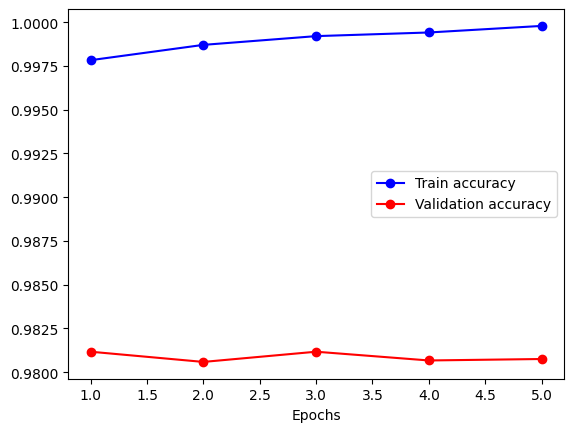

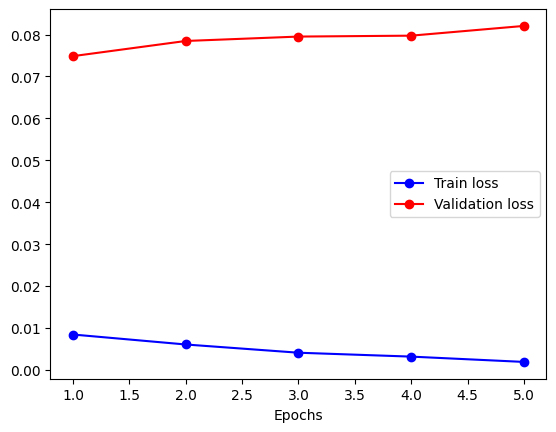

In [ ]:
#
#  Trains the model!!
#
val_split_ratio = 0.2 # reserves 20% of training data for validation purposes
history = model.fit(x_train,
          y_train,
          batch_size = bs,
          validation_split = val_split_ratio,
          epochs = num_epochs)


def training_info(history):
  #
  #  Function to visually evaluate the training session
  #

  # Plot of the accuracy
  num_epochs = len(history.history['accuracy'])
  vec_epochs = np.arange(1, num_epochs + 1)
  plt.plot(vec_epochs, history.history['accuracy'], 'bo-')
  plt.plot(vec_epochs,history.history['val_accuracy'], 'ro-')
  plt.xlabel("Epochs")
  plt.legend(['Train accuracy','Validation accuracy'])

  # Plot of the loss
  plt.figure()
  plt.plot(vec_epochs, history.history['loss'], 'bo-')
  plt.plot(vec_epochs, history.history['val_loss'], 'ro-')
  plt.xlabel("Epochs")
  plt.legend(['Train loss','Validation loss'])

  #
  # Gets best train and validation accuracy
  #
  max_train = np.max(history.history['accuracy'])
  last_train = history.history['accuracy'][-1]

  max_val = np.max(history.history['val_accuracy'])
  last_val = history.history['val_accuracy'][-1]
  return max_train, last_train, max_val, last_val

#
#  Shows some parameters related to the training session
#
max_train, last_train, max_val, last_val = training_info(history)
print('\nBest train accuracy: %f' % max_train)
print('Last train accuracy: %f' % last_train)
print('Best validation accuracy: %f' % max_val)
print('Last validation accurac: %f' % last_val)



Given the trained model, we will  **evaluate** it using the test set, which contains unseen data. Compare the accuracy of the test set with the accuracies of the train and validation sets.

In [ ]:

#
# Evaluates the model in the test set
#
loss, acc = model.evaluate(x_test, y_test)
print('\nResults of model.evaluate in the test set')
print('Loss: %1.4f' % loss)
print('Accuracy: %1.4f' % acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0834

Results of model.evaluate in the test set
Loss: 0.0703
Accuracy: 0.9822


Finally, we will make **predictions** on test images, and find worngly classified images (i.e., images for which the predictions **do not match** the GT annotation. Then, will perform a visual inspection on a small subset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
From a total of 10000 images, 178 were wrongly classified


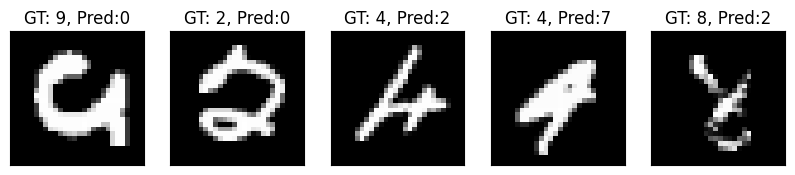

In [ ]:
#
# Finds wrongly classified images
#

# First, get the softmax scores produced by the network
y_scores = model.predict(x_test)

# Finds the winning label (argmax)
y_pred = np.argmax(y_scores, axis = -1)

# Finds wrongly classified images
errors = np.where( y_pred != y_test )[0]

print('From a total of %d images, %d were wrongly classified' % (len(y_scores), len(errors)))

# Randomizes the list of wrongly classified images
random = np.random.permutation(len(errors))
errors = errors[random]

# Shows 5 randomly classified images
n = 5
fig = plt.figure(figsize=(10, 4))
for i in range(n):
  ind = errors[i]
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(x_test[ind])
  plt.title('GT: %d, Pred:%d' % (y_test[ind], y_pred[ind]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Exercises**

Now, you can change several parameters related to the **architecture of the network** (number of hidden layers, number of neurons in each layer, activation functions, etc.) and also parameters related to the **training session** (optimizer, learning rate, number of epochs, etc.)
